In [597]:
import matplotlib.pyplot as plt
import numpy             as np

In [598]:
l = 9.9 * 0.01 # m
g = 9.81

RHO_GLASS = 2500
RHO_STEEL = 7800

In [599]:
def LeastSquares(x_arr, y_arr): # returns [k, b, sigma_k, sigma b]
    v = x_arr
    u = y_arr

    N = len(v)

    mu = np.mean(u) # средее
    mv = np.mean(v)
    mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
    mu2 = np.mean([u_i**2 for u_i in u])
    muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
    k = (muv - mu * mv) / (mv2 - mv**2)
    b = mu - k * mv

    sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    sigma_b = sigma_k * np.sqrt(mv2)

    return (k, b, sigma_k, sigma_b)

In [600]:
def GetCalcReport (res_name, res_measure, val, sigma, n_round):
    print ("$" + res_name + " = (" + str(round(val, n_round)) + "~\\pm " + str(round(sigma, n_round)) + ") ~\\text{" + res_measure + "} ~(\\varepsilon ~\\approx " + str(round(sigma / val * 100, 2)) + " \\%) " + "$")

In [601]:
class Experiment:
    def __init__ (self, T, glass_ds, metal_ds, times_glass, times_steel):
        self.T = T + 273.15
        self.T_C = T

        self.g_r_ = [i/2 * 0.001 for i in glass_ds]
        self.s_r_ = [i/2 * 0.001 for i in metal_ds]
        self.time_glass_ = times_glass
        self.time_steel_ = times_steel

        self.v_ust_g_ = [l/np.mean(times_glass[0]), l/np.mean(times_glass[1])]
        self.sigma_v_ust_g_ = [0.001 * self.v_ust_g_[i] for i in range(2)]
        self.v_ust_s_ = [l/np.mean(times_steel[0]), l/np.mean(times_steel[1])]
        self.sigma_v_ust_s_ = [0.001 * self.v_ust_s_[i] for i in range(2)]

        print ("initialized")

    def calc_etta (self, rho_z):
        self.etta_g_ = [2 / 9 * g * self.g_r_[i] **2 * (RHO_GLASS - rho_z) / self.v_ust_g_[i] for i in range (2)]
        self.sigma_etta_g_ = [2 / 9 * g * self.g_r_[i] **2 * (RHO_GLASS - rho_z) / (self.v_ust_g_[i]**2) * self.sigma_v_ust_g_[i] for i in range (2)]
        self.etta_s_ = [2 / 9 * g * self.s_r_[i] **2 * (RHO_STEEL - rho_z) / self.v_ust_s_[i] for i in range (2)]
        self.sigma_etta_s_ = [2 / 9 * g * self.s_r_[i] **2 * (RHO_STEEL - rho_z) / (self.v_ust_s_[i]**2) * self.sigma_v_ust_s_[i] for i in range (2)]

        self.etta_g_ = [round(i, 3) for i in self.etta_g_]
        self.etta_s_ = [round(i, 3) for i in self.etta_s_]

        print (str(round(self.T, 2)) + " g: ", self.etta_g_)
        print (str(round (self.T, 2)) + " s: ", self.etta_s_)

    def calc_re (self, rho_z):
        self.re_g_ = [self.v_ust_g_[i] * self.g_r_[i] * rho_z / self.etta_g_[i] for i in range (2)]
        self.re_s_ = [self.v_ust_s_[i] * self.s_r_[i] * rho_z / self.etta_s_[i] for i in range (2)]

        self.re_g_ = [round (i, 3) for i in self.re_g_]
        self.re_s_ = [round (i, 3) for i in self.re_s_]

        print (str(round(self.T, 2)) + " g: ", self.re_g_)
        print (str(round (self.T, 2)) + " s: ", self.re_s_)

    def calc_tau (self):
        self.tau_g_ = [2 / 9 * self.g_r_[i] * RHO_GLASS / self.etta_g_[i] for i in range(2)]
        self.tau_s_ = [2 / 9 * self.s_r_[i] * RHO_STEEL / self.etta_s_[i] for i in range(2)]

        self.tau_g_ = [round(i, 3) for i in self.tau_g_]
        self.tau_s_ = [round (i, 3) for i in self.tau_s_]

        print (str(round(self.T, 2)) + " g: ", self.tau_g_)
        print (str(round (self.T, 2)) + " s: ", self.tau_s_)

    def calc_s (self):
        self.s_g_ = [round(self.v_ust_g_[i] * self.tau_g_[i], 3) for i in range(2)]
        self.s_s_ = [round(self.v_ust_s_[i] * self.tau_s_[i], 3) for i in range(2)]

        print (str(round(self.T, 3)) + " g: ", self.s_g_)
        print (str(round (self.T, 3)) + " s: ", self.s_s_)

In [602]:
E1 = Experiment (
    25.40,
    [2.1, 2.15],
    [0.7, 0.9],
    [[24.45, 24.47], [24.78, 24.26]],
    [[37.21, 37.21], [24.91, 24.93]]
)

E2 = Experiment (
    35.83,
    [2.15, 2.15],
    [0.8, 0.75],
    [[11.55, 11.59], [11.11, 11.47]],
    [[11.46, 11.49], [16.22, 16.20]]
)

E3 = Experiment (
    40.83,
    [2.1, 2.05],
    [0.9, 0.6],
    [[9.93, 10.09], [9.30, 9.23]],
    [[10.47, 10.93], [13.65, 13.63]]
)

E4 = Experiment (
    50.85,
    [2.15, 2.10],
    [0.75, 0.7],
    [[5, 5.34], [4.62, 4.84]],
    [[7.72, 7.94], [7.15, 7.49]]
)

E5 = Experiment (
    60.63,
    [2.2, 2],
    [0.7, 0.75],
    [[2.59, 3.18], [2.49, 2.78]],   # температура уже 60
    [[4.16, 4.49], [4.93, 5.62]]
)
# последний шарик долго не получался изза кривых рук и шуток судьбы

initialized
initialized
initialized
initialized
initialized


In [603]:
E1.calc_etta (1258)
E2.calc_etta (1254)
E3.calc_etta (1251)
E4.calc_etta (1248)
E5.calc_etta (1243)

298.55 g:  [0.738, 0.775]
298.55 s:  [0.657, 0.727]
308.98 g:  [0.367, 0.358]
308.98 s:  [0.265, 0.329]
313.98 g:  [0.304, 0.268]
313.98 s:  [0.312, 0.177]
324.0 g:  [0.165, 0.144]
324.0 s:  [0.159, 0.129]
333.78 g:  [0.097, 0.073]
333.78 s:  [0.076, 0.107]


In [604]:
E1.calc_re (1258)
E2.calc_re (1254)
E3.calc_re (1251)
E4.calc_re (1248)
E5.calc_re (1243)

298.55 g:  [0.007, 0.007]
298.55 s:  [0.002, 0.003]
308.98 g:  [0.031, 0.033]
308.98 s:  [0.016, 0.009]
313.98 g:  [0.043, 0.051]
313.98 s:  [0.017, 0.015]
324.0 g:  [0.156, 0.19]
324.0 s:  [0.037, 0.046]
333.78 g:  [0.484, 0.64]
333.78 s:  [0.131, 0.082]


In [605]:
E1.calc_tau ()
E2.calc_tau ()
E3.calc_tau ()
E4.calc_tau ()
E5.calc_tau ()

298.55 g:  [0.79, 0.771]
298.55 s:  [0.923, 1.073]
308.98 g:  [1.627, 1.668]
308.98 s:  [2.616, 1.976]
313.98 g:  [1.919, 2.125]
313.98 s:  [2.5, 2.938]
324.0 g:  [3.62, 4.051]
324.0 s:  [4.088, 4.703]
333.78 g:  [6.3, 7.61]
333.78 s:  [7.982, 6.075]


In [606]:
E1.calc_s ()
E2.calc_s ()
E3.calc_s ()
E4.calc_s ()
E5.calc_s ()

298.55 g:  [0.003, 0.003]
298.55 s:  [0.002, 0.004]
308.98 g:  [0.014, 0.015]
308.98 s:  [0.023, 0.012]
313.98 g:  [0.019, 0.023]
313.98 s:  [0.023, 0.021]
324.0 g:  [0.069, 0.085]
324.0 s:  [0.052, 0.064]
333.78 g:  [0.216, 0.286]
333.78 s:  [0.183, 0.114]


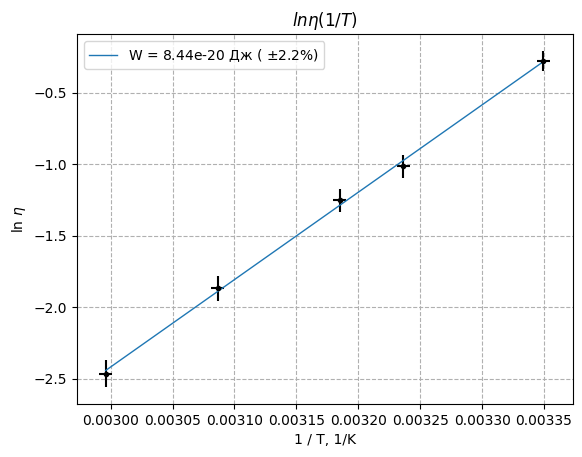

In [607]:
eta_g_ = [np.mean([E1.etta_g_[0], E1.etta_g_[1]]), np.mean([E2.etta_g_[0], E2.etta_g_[1]]), np.mean([E3.etta_g_[0], E3.etta_g_[1]]), np.mean([E4.etta_g_[0], E4.etta_g_[1]]), np.mean([E5.etta_g_[0], E5.etta_g_[1]]),]
eta_s_ = [np.mean([E1.etta_s_[0], E1.etta_s_[1]]), np.mean([E2.etta_s_[0], E2.etta_s_[1]]), np.mean([E3.etta_s_[0], E3.etta_s_[1]]), np.mean([E4.etta_s_[0], E4.etta_s_[1]]), np.mean([E5.etta_s_[0], E5.etta_s_[1]]),]

sigma_eta_g_ = [np.mean([E1.sigma_etta_g_[0], E1.sigma_etta_g_[1]]), np.mean([E2.sigma_etta_g_[0], E2.sigma_etta_g_[1]]), np.mean([E3.sigma_etta_g_[0], E3.sigma_etta_g_[1]]), np.mean([E4.sigma_etta_g_[0], E4.sigma_etta_g_[1]]), np.mean([E5.sigma_etta_g_[0], E5.sigma_etta_g_[1]]),]
sigma_eta_s_ = [np.mean([E1.sigma_etta_s_[0], E1.sigma_etta_s_[1]]), np.mean([E2.sigma_etta_s_[0], E2.sigma_etta_s_[1]]), np.mean([E3.sigma_etta_s_[0], E3.sigma_etta_s_[1]]), np.mean([E4.sigma_etta_s_[0], E4.sigma_etta_s_[1]]), np.mean([E5.sigma_etta_s_[0], E5.sigma_etta_s_[1]]),]

ln_eta_g_ = [np.log(i) for i in eta_g_]
sigma_ln_eta_g_= [abs(np.log(i) / 100) for i in sigma_eta_g_]

T = [298.55, 308.98, 313.98, 324, 333.78]
delta_T = 0.5
eps = delta_T / 300

TTTT = [1 / T for T in T]

sigma_1_t = [eps * 1 / T for T in T]

plt.title ("$ln\eta (1/T)$")
plt.xlabel ("1 / T, 1/K")
plt.ylabel ("ln $\eta$")
plt.grid (True, linestyle='--')
plt.errorbar (TTTT, ln_eta_g_, sigma_ln_eta_g_, sigma_1_t, ls = "None", fmt=".k")

k, b, z, z2 = LeastSquares (TTTT, ln_eta_g_)
x = np.array ([TTTT[0], TTTT[-1]])
plt.plot (x, k * x + b, "-", linewidth = 1, label = "W = " + "{:.2e}".format(k * 1.38 * 1e-23) + " Дж ( $\pm$" + str(round(z/k * 100, 1)) + "%)")

plt.legend ()

ц1 = k * 1.38 * 1e-23
сц1 = z * 1.38 * 1e-23

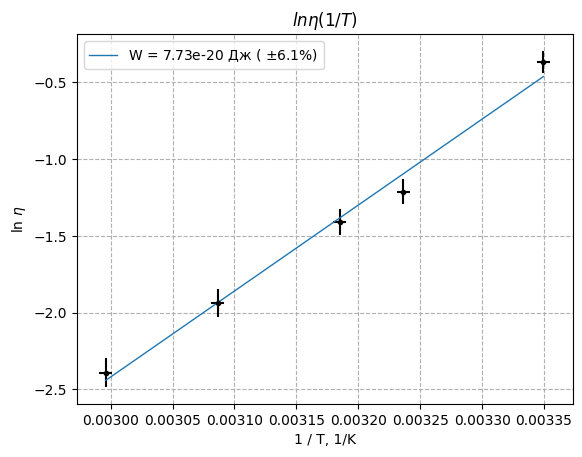

In [608]:
ln_eta_s_ = [np.log(i) for i in eta_s_]
sigma_ln_eta_s_= [abs(np.log(i) / 100) for i in sigma_eta_s_]

T = [298.55, 308.98, 313.98, 324, 333.78]
delta_T = 0.5
eps = delta_T / 300

TTTT = [1 / T for T in T]

sigma_1_t = [eps * 1 / T for T in T]

plt.title ("$ln\eta (1/T)$")
plt.xlabel ("1 / T, 1/K")
plt.ylabel ("ln $\eta$")
plt.grid (True, linestyle='--')
plt.errorbar (TTTT, ln_eta_s_, sigma_ln_eta_s_, sigma_1_t, ls = "None", fmt=".k")

k, b, z, z2 = LeastSquares (TTTT, ln_eta_s_)
x = np.array ([TTTT[0], TTTT[-1]])
plt.plot (x, k * x + b, "-", linewidth = 1, label = "W = " + "{:.2e}".format(k * 1.38 * 1e-23) + " Дж ( $\pm$" + str(round(z/k * 100, 1)) + "%)")

plt.legend ()

ц2 = k * 1.38 * 1e-23
сц2 = z * 1.38 * 1e-23

In [609]:
GetCalcReport ("W", "10^{-20}Дж", np.mean([ц1, ц2]) * 1e20, np.sqrt (сц2**2 + сц1**2) * 1e20, 2)

$W = (8.08~\pm 0.51) ~\text{10^{-20}Дж} ~(\varepsilon ~\approx 6.29 \%) $
